In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
alpha = pd.read_csv("alpha.csv")
beta = pd.read_csv("beta.csv")
charlie = pd.read_csv("charlie.csv")

alpha = alpha.sample(frac=1).reset_index(drop=True)
alpha["Device_name"] = "Alpha"
beta = beta.sample(frac=1).reset_index(drop=True)
beta["Device_name"] = "Beta"
charlie = charlie.sample(frac=1).reset_index(drop=True)
charlie["Device_name"] = "Charlie"


data = alpha.append(beta).append(charlie).sample(frac=1).reset_index(drop=True)

In [3]:
data

,created_at,Temperature,Humidity,MQ7_analog,MQ9_analog,MG811_analog,MQ135_analog,CO2,Device_name
0,2023-05-24 03:31:00,29.115,75.965,4497.0,5277.5,5501.0,3685.0,605.5,Charlie
1,2023-05-06 00:43:00,29.490,70.050,5394.5,5028.0,4137.5,3770.0,619.5,Charlie
2,2023-05-24 04:34:00,29.330,75.375,4507.5,5282.0,5547.5,3687.5,617.0,Charlie
3,2023-05-07 06:53:00,27.175,73.960,4067.5,3758.0,2613.0,3465.5,640.5,Beta
4,2023-05-07 05:53:00,31.640,58.150,2861.0,1669.0,4468.0,3577.0,658.5,Alpha
...,...,...,...,...,...,...,...,...,...
8594,2023-05-05 23:32:00,32.890,58.340,3364.0,2113.0,5416.0,3283.0,611.0,Alpha
8595,2023-05-24 00:10:00,32.045,66.075,5508.5,3213.5,4960.5,2935.5,612.5,Alpha
8596,2023-05-03 02:27:00,28.885,71.365,4028.5,4139.0,3192.0,2942.0,609.5,Charlie
8597,2023-05-05 22:24:00,29.760,66.620,5569.0,5043.5,4174.5,3834.0,599.0,Charlie


In [4]:
data = data.drop(columns=["created_at"])

# Drop rows where the value of 'column_name' is 0
#data = data.loc[data['CO'] != 0]


In [5]:
data

,Temperature,Humidity,MQ7_analog,MQ9_analog,MG811_analog,MQ135_analog,CO2,Device_name
0,29.115,75.965,4497.0,5277.5,5501.0,3685.0,605.5,Charlie
1,29.490,70.050,5394.5,5028.0,4137.5,3770.0,619.5,Charlie
2,29.330,75.375,4507.5,5282.0,5547.5,3687.5,617.0,Charlie
3,27.175,73.960,4067.5,3758.0,2613.0,3465.5,640.5,Beta
4,31.640,58.150,2861.0,1669.0,4468.0,3577.0,658.5,Alpha
...,...,...,...,...,...,...,...,...
8594,32.890,58.340,3364.0,2113.0,5416.0,3283.0,611.0,Alpha
8595,32.045,66.075,5508.5,3213.5,4960.5,2935.5,612.5,Alpha
8596,28.885,71.365,4028.5,4139.0,3192.0,2942.0,609.5,Charlie
8597,29.760,66.620,5569.0,5043.5,4174.5,3834.0,599.0,Charlie


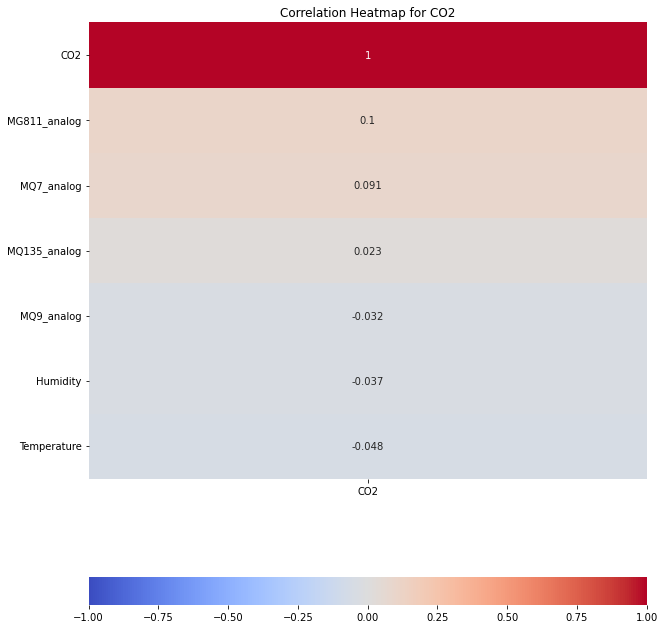

In [6]:
# Create a correlation matrix for the DataFrame
correlation_matrix = data.corr()

# Plot the correlation heatmap for the 'CO2' column
plt.figure(figsize=(10, 12))
sns.heatmap(correlation_matrix[['CO2']].sort_values(by='CO2', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1,cbar_kws={"orientation": "horizontal"})
plt.title('Correlation Heatmap for CO2')

# Save the plot as an image
plt.savefig('Data_co2_correlation_plot.png', bbox_inches='tight')

plt.show()

In [7]:
target = data.CO2
data = data.drop(["CO2"], axis = 1)

In [8]:
"""import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler

# Assuming you have your dataframe 'df' with the features to be scaled

# Step 1: Create a MinMaxScaler object
scaler = MinMaxScaler()

# Step 2: Fit the scaler to the data and transform the data
scaled_data = scaler.fit_transform(data)

# Step 3: Convert the scaled data back to a dataframe (optional)
data = pd.DataFrame(scaled_data, columns=data.columns)
"""

"import pandas as pd\nfrom sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler\n\n# Assuming you have your dataframe 'df' with the features to be scaled\n\n# Step 1: Create a MinMaxScaler object\nscaler = MinMaxScaler()\n\n# Step 2: Fit the scaler to the data and transform the data\nscaled_data = scaler.fit_transform(data)\n\n# Step 3: Convert the scaled data back to a dataframe (optional)\ndata = pd.DataFrame(scaled_data, columns=data.columns)\n"

In [9]:
data.isnull().sum()

Temperature     0
Humidity        0
MQ7_analog      0
MQ9_analog      0
MG811_analog    0
MQ135_analog    0
Device_name     0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599 entries, 0 to 8598
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temperature   8599 non-null   float64
 1   Humidity      8599 non-null   float64
 2   MQ7_analog    8599 non-null   float64
 3   MQ9_analog    8599 non-null   float64
 4   MG811_analog  8599 non-null   float64
 5   MQ135_analog  8599 non-null   float64
 6   Device_name   8599 non-null   object 
dtypes: float64(6), object(1)
memory usage: 470.4+ KB


In [11]:
data.describe()

,Temperature,Humidity,MQ7_analog,MQ9_analog,MG811_analog,MQ135_analog
count,8599.000000,8599.000000,8599.000000,8599.000000,8599.000000,8599.000000
mean,29.682396,69.570068,4224.497558,3968.435981,3987.061693,3437.993604
std,2.015119,7.240786,1084.094880,1603.849838,1095.213509,894.089893
min,23.440000,52.200000,2380.000000,1098.500000,1353.000000,1186.500000
25%,28.480000,65.592500,3360.416667,2826.250000,3181.000000,2909.000000
50%,29.290000,70.570000,4057.000000,4070.500000,4134.500000,3585.500000
75%,31.720000,74.335000,4772.500000,5284.750000,4721.250000,4142.000000
max,33.850000,93.525000,9545.500000,10433.000000,7919.000000,6285.000000


In [12]:
mapping = {
    'Alpha': 0,
    'Beta': 1,
    'Charlie': 2,
}

data["Device_name"] = data["Device_name"].map(mapping)

In [13]:
data

,Temperature,Humidity,MQ7_analog,MQ9_analog,MG811_analog,MQ135_analog,Device_name
0,29.115,75.965,4497.0,5277.5,5501.0,3685.0,2
1,29.490,70.050,5394.5,5028.0,4137.5,3770.0,2
2,29.330,75.375,4507.5,5282.0,5547.5,3687.5,2
3,27.175,73.960,4067.5,3758.0,2613.0,3465.5,1
4,31.640,58.150,2861.0,1669.0,4468.0,3577.0,0
...,...,...,...,...,...,...,...
8594,32.890,58.340,3364.0,2113.0,5416.0,3283.0,0
8595,32.045,66.075,5508.5,3213.5,4960.5,2935.5,0
8596,28.885,71.365,4028.5,4139.0,3192.0,2942.0,2
8597,29.760,66.620,5569.0,5043.5,4174.5,3834.0,2


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as lgb
import xgboost as xgb
import catboost as cb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

# Assuming you have the data loaded in 'data' and the labels in 'target'

# Step 1: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Step 2: Build regression models using k-fold cross-validation
models = {
    "LGBM": lgb.LGBMRegressor(),
    "XGBoost": xgb.XGBRegressor(),
    "CatBoost": cb.CatBoostRegressor(silent=True, n_estimators=100),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "Linear Regression": LinearRegression(),
    "MLP": MLPRegressor(hidden_layer_sizes=(100, 50, 10), max_iter=500, random_state=42)
}

eval_metrics = {
    "MAE": mean_absolute_error,
    "RMSE": lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    "R2": r2_score,
    "MSE": mean_squared_error
}

results = []

for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    cv_mae = -cv_scores.mean()  # Since cross_val_score returns negative MAE

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_results = {"Model": model_name, "CrossVal MAE": cv_mae}

    for metric_name, metric_func in eval_metrics.items():
        metric_value = metric_func(y_test, y_pred)
        model_results[metric_name] = metric_value

    results.append(model_results)

# Step 3: Save the results in a DataFrame
results_df = pd.DataFrame(results)

results_df

,Model,CrossVal MAE,MAE,RMSE,R2,MSE
0,LGBM,3.988556,3.924132,6.227782,0.852318,38.785265
1,XGBoost,3.668356,3.556161,6.041124,0.861037,36.495176
2,CatBoost,4.300666,4.125319,6.242896,0.851600,38.973744
3,Random Forest,3.190473,2.979514,5.296132,0.893198,28.049011
4,Gradient Boosting,6.077095,6.057986,8.830517,0.703083,77.978035
5,SVR,12.039818,11.818879,15.830587,0.045763,250.607499
6,Linear Regression,12.738392,12.577324,15.812657,0.047923,250.040135
7,MLP,14.132048,13.428434,16.621340,-0.051948,276.268950


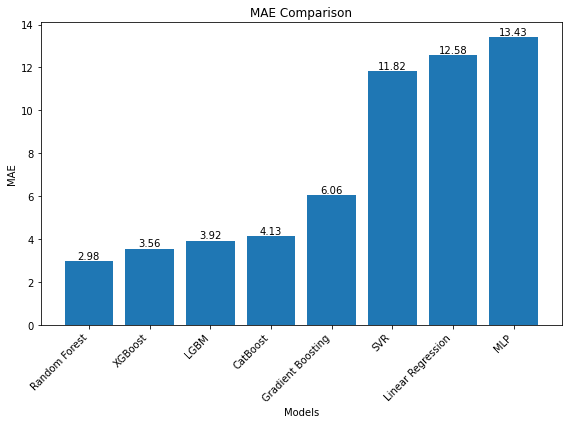

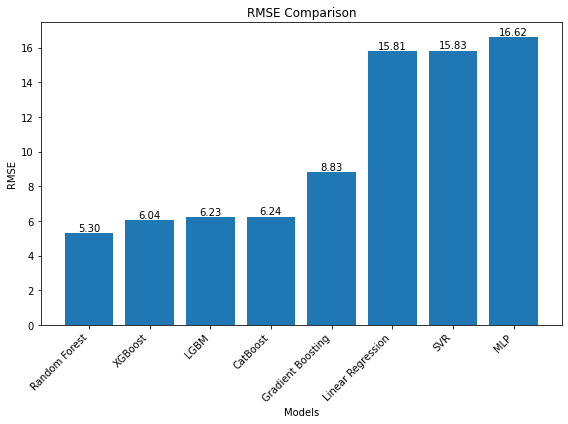

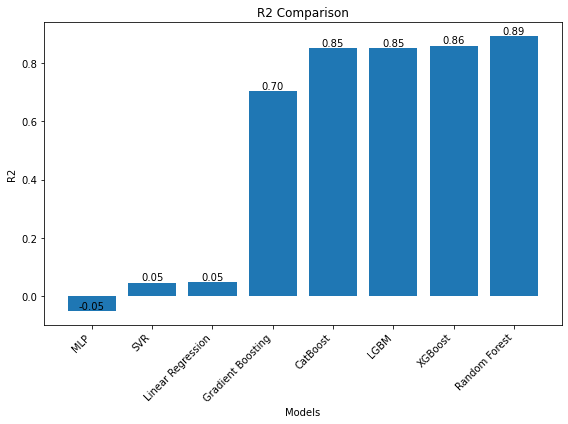

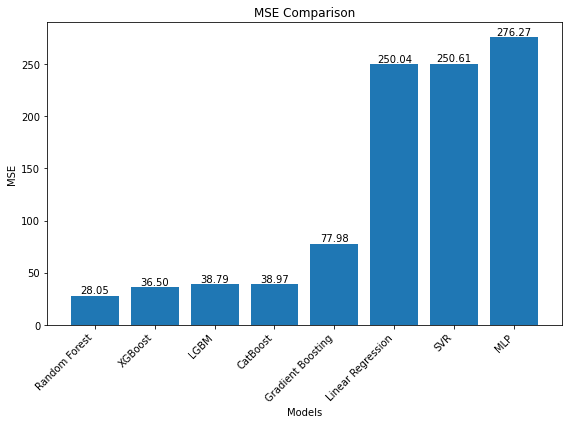

In [15]:
# Step 4: Plot bar charts for each metric
metrics_to_plot = list(eval_metrics.keys())

for metric in metrics_to_plot:
    plt.figure(figsize=(8, 6))
    sorted_results = results_df.sort_values(metric, ascending=True)
    bars = plt.bar(sorted_results["Model"], sorted_results[metric])
    plt.xlabel("Models")
    plt.ylabel(metric)
    plt.title(f"{metric} Comparison")
    plt.xticks(rotation=45, ha='right')
    
    # Annotate the bars with their corresponding metric values
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2., height, f"{height:.2f}",
                 ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()


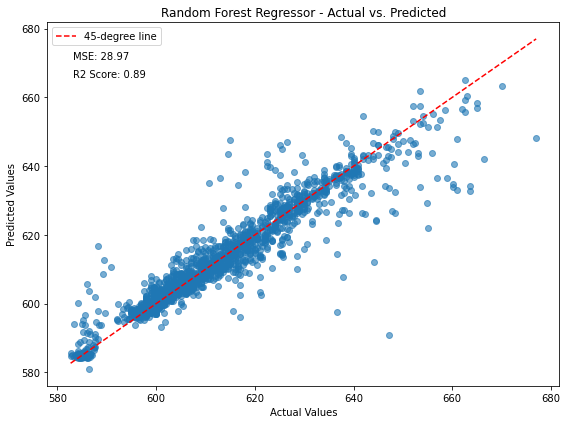

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have the data loaded in 'data' and the labels in 'target'

# Step 1: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Step 2: Build the Random Forest regression model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 4: Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 5: Create a scatter plot of actual vs. predicted values with a reference line
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='45-degree line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regressor - Actual vs. Predicted')
plt.text(0.05, 0.9, f'MSE: {mse:.2f}', transform=plt.gca().transAxes)
plt.text(0.05, 0.85, f'R2 Score: {r2:.2f}', transform=plt.gca().transAxes)
plt.legend()
plt.tight_layout()
# Save the plot as an image
plt.savefig('Random Forest CO2 ActualvsPredicted.png', bbox_inches='tight')
plt.show()


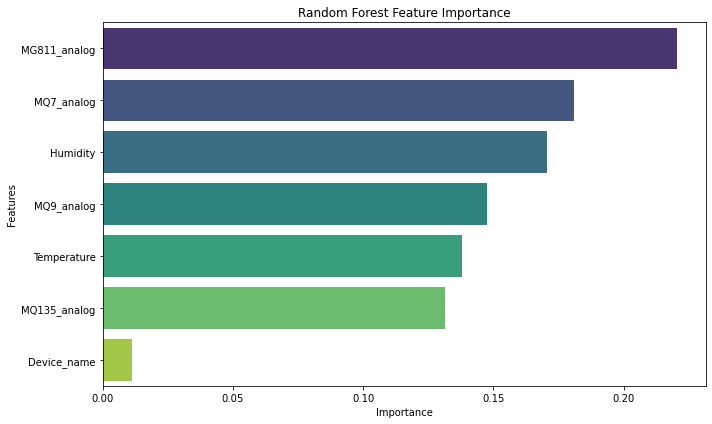

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

# Assuming you have the data loaded in 'data' and the labels in 'target'

# Step 1: Build the Random Forest regression model
rf_model = RandomForestRegressor()
rf_model.fit(data, target)

# Step 2: Get feature importances
feature_importance = rf_model.feature_importances_

# Step 3: Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': data.columns, 'Importance': feature_importance})

# Step 4: Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Step 5: Plot the feature importance as a bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()


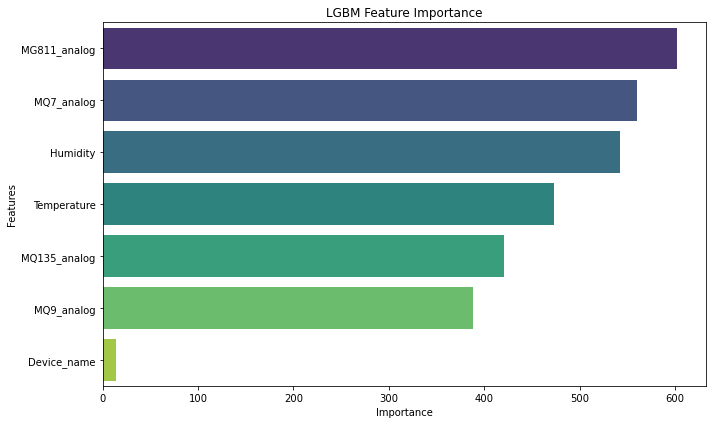

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb

# Assuming you have the data loaded in 'data' and the labels in 'target'

# Step 1: Build the LGBM regression model
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(data, target)

# Step 2: Get feature importances
feature_importance = lgb_model.feature_importances_

# Step 3: Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': data.columns, 'Importance': feature_importance})

# Step 4: Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Step 5: Plot the feature importance as a bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('LGBM Feature Importance')
plt.tight_layout()
plt.show()


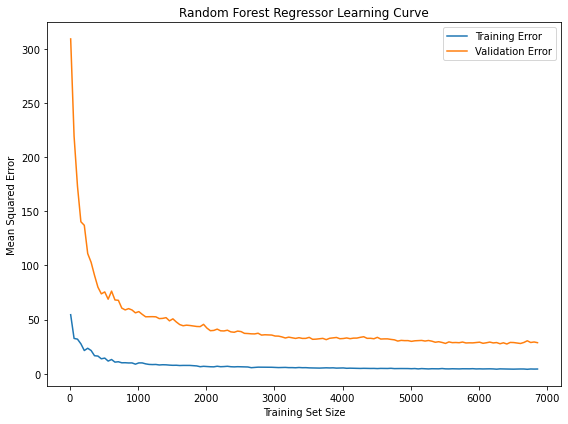

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming you have the data loaded in 'data' and the labels in 'target'

# Step 1: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Step 2: Initialize the Random Forest regression model
rf_model = RandomForestRegressor()

# Step 3: Create lists to store training and validation errors
train_errors, val_errors = [], []

# Step 4: Vary the size of the training set and compute errors
min_samples = 10  # Minimum size of the training set
step_size = 50    # Increase the training set size by this step

for i in range(min_samples, len(X_train), step_size):
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=i, random_state=42)
    
    rf_model.fit(X_train_subset, y_train_subset)
    
    # Calculate training and validation errors
    y_train_pred = rf_model.predict(X_train_subset)
    y_val_pred = rf_model.predict(X_test)
    
    train_error = mean_squared_error(y_train_subset, y_train_pred)
    val_error = mean_squared_error(y_test, y_val_pred)
    
    train_errors.append(train_error)
    val_errors.append(val_error)

# Step 5: Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(range(min_samples, len(X_train), step_size), train_errors, label='Training Error')
plt.plot(range(min_samples, len(X_train), step_size), val_errors, label='Validation Error')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Random Forest Regressor Learning Curve')
plt.legend()
plt.tight_layout()
plt.savefig('Random Forest Regressor Learning Curve.png', bbox_inches='tight')
plt.show()


In [20]:
import joblib
import lightgbm as lgb
import catboost as cb
from sklearn.ensemble import RandomForestRegressor

# Assuming you have the data loaded in 'data' and the labels in 'target'

# Step 1: Train the models
rf_model = RandomForestRegressor()
rf_model.fit(data, target)

lgb_model = lgb.LGBMRegressor()
lgb_model.fit(data, target)

catboost_model = cb.CatBoostRegressor(silent=True, n_estimators=100)
catboost_model.fit(data, target)

# Step 2: Save the models to files using joblib, LightGBM's save_model(), and CatBoost's save_model()
rf_model_filename = 'random_forest_model.pkl'
lgb_model_filename = 'lgb_model.pkl'
catboost_model_filename = 'catboost_model.pkl'

joblib.dump(rf_model, rf_model_filename)
joblib.dump(lgb_model,lgb_model_filename)  # Corrected line for saving LightGBM model
joblib.dump(catboost_model,catboost_model_filename)


['catboost_model.pkl']

In [21]:
#import pickle
#catboost_model = pickle.dump(model, open("catboost_model.pkl", 'wb')) #Saving the model

In [22]:
import joblib

# Step 3: Load the saved model from the file
rf_model = joblib.load('random_forest_model.pkl')
lgb_model = joblib.load('lgb_model.pkl')
catboost_model = joblib.load('catboost_model.pkl')

In [23]:
sample = {
        "Temperature":32.47,
        "Humidity":59.26,
        "MQ7_analog":2867.0,
        "MQ9_analog":1539.0,
        "MG811_analog":4654.0,
        "MQ135_analog":2564.0,
        "Device_name": "Alpha"
    }
        

mapping = {
    'Alpha': 0,
    'Beta': 1,
    'Charlie': 2,
}
# Convert the JSON data into a DataFrame
sample = pd.DataFrame([sample])

sample["Device_name"] = sample["Device_name"].map(mapping)
sample

,Temperature,Humidity,MQ7_analog,MQ9_analog,MG811_analog,MQ135_analog,Device_name
0,32.47,59.26,2867.0,1539.0,4654.0,2564.0,0


In [24]:
data = sample.copy()
import json

In [25]:
print("Random Forest Model",json.dumps(rf_model.predict(data).tolist()[0]))
print("Light GBM Model",json.dumps(lgb_model.predict(data).tolist()[0]))
print("Catboost Model",json.dumps(catboost_model.predict(data).tolist()[0]))

Random Forest Model 615.635
Light GBM Model 621.4841083779005
Catboost Model 617.7365549932734
